Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

### Code answers

In questions that require you to write code, there will usually be a code cell containing: 
    
<code># YOUR CODE HERE</code>
<br>
<code>raise NotImplementedError()</code>
    
When you are ready to write your answer, delete <code>raise NotImplementedError()</code> and write your code.

**Do not delete or modify any other cells**

In [187]:
NAME = "Sumbal Akram"
ROLL_NUMBER = "MSDS20030"
EMAIL = "msds20030@itu.edu.pk"

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

# Assignment 1 – Pandas and Matplotlib
This assignment requires more individual learning - you are encouraged to check out the panda’s documentation to find functions or methods you might not have used yet, or ask questions on Stack Overflow and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.


In [189]:
# IMPORT LIBRARIES HERE
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline 

from typing import Tuple, Union, List

import seaborn as sns
sns.set(rc={'figure.figsize':(14,8)})
sns.set_theme()

import plotly.express as px
import plotly.graph_objects as go

## Part 1 - Preprocessing and exploration

In [190]:
## Load dataset
covid_df = pd.read_csv("/content/drive/My Drive/Assignment_Data/covid19.csv")
covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [191]:
### 1
def count_missing(df: pd.DataFrame) -> int:
    """Total number of missing values in entire dataframe"""
    count=df.isnull().sum().values.sum()
    return count
    #raise NotImplementedError()

In [192]:
### Count missing values
count = count_missing(covid_df)
count

34404

In [193]:
### DO NOT EDIT

In [194]:
### 2
def find_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """Find rows containing outliers with IQR"""
    col_name=['Confirmed', 'Active','Recovered','Deaths']
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_index = df[col_name].loc[((df[col_name] < low) | (df[col_name] > high)).any(axis=1)].index
    return df.iloc[df_index]
    
   # raise NotImplementedError()

In [195]:
### Find outliers
outliers = find_outliers(covid_df)
outliers

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
1366,Hubei,China,30.975600,112.270700,1/27/2020,1423,76,45,1302,Western Pacific
1627,Hubei,China,30.975600,112.270700,1/28/2020,3554,125,80,3349,Western Pacific
1888,Hubei,China,30.975600,112.270700,1/29/2020,3554,125,88,3341,Western Pacific
2149,Hubei,China,30.975600,112.270700,1/30/2020,4903,162,90,4651,Western Pacific
2410,Hubei,China,30.975600,112.270700,1/31/2020,5806,204,141,5461,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
49046,NaN,Mali,17.570692,-3.996166,7/27/2020,2513,124,1913,476,Africa
49050,NaN,Kosovo,42.602636,20.902977,7/27/2020,7413,185,4027,3201,Europe
49058,NaN,Malawi,-13.254300,34.301500,7/27/2020,3664,99,1645,1920,Africa
49064,NaN,Yemen,15.552727,48.516388,7/27/2020,1691,483,833,375,Eastern Mediterranean


In [196]:
### DO NOT EDIT

In [197]:
### Method to delete certain rows from overall df
def delete_rows(df: pd.DataFrame, to_delete: pd.DataFrame) -> pd.DataFrame:
    """Remove the subset of rows in to_delete from df and return
     the resulting dataframe
    """
    del_rows = df.drop(df.index[to_delete.index])
    return del_rows
    #raise NotImplementedError()

In [198]:
### Remove outliers
covid_df_wo = delete_rows(covid_df, outliers)
covid_df_wo

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49061,NaN,South Sudan,6.87700,31.307000,7/27/2020,2305,46,1175,1084,Africa
49062,NaN,Western Sahara,24.21550,-12.885800,7/27/2020,10,1,8,1,Africa
49063,NaN,Sao Tome and Principe,0.18640,6.613100,7/27/2020,865,14,734,117,Africa
49065,NaN,Comoros,-11.64550,43.333300,7/27/2020,354,7,328,19,Africa


In [199]:
### DO NOT EDIT

In [200]:
### Method to group data by a column
def groupby_col(df: pd.DataFrame, col: str) -> pd.core.groupby.generic.DataFrameGroupBy:
    return df.groupby(col)
    
    #raise NotImplementedError()

In [201]:
covid_df_bycountry = groupby_col(covid_df_wo, 'Country/Region')
covid_df_bycontinent = groupby_col(covid_df_wo, 'WHO Region')

In [202]:
### DO NOT EDIT


In [203]:
### Method to find total number of confirmed cases, 
### deaths reported, recovered and active cases 
### around the globe and mortality rate
def overall_stats(df: pd.DataFrame) -> pd.Series:
    """Find total confirmed, deaths, recovered, active cases and mortality rate
    Resulting series should have index/columns of
    [Confirmed, Deaths, Recovered, Active, MortalityRate]
    """
    Total=df.sum()
    Total['Mortality rate'] = (Total['Deaths']/Total['Confirmed'])*100
    return Total

In [204]:
### TODO Add active
### Find total recovered, confirmed, deaths, active cases and mortality rate
covid_df_num = covid_df_wo[['Confirmed', 'Deaths', 'Recovered', 'Active']]
stats_total = overall_stats(covid_df_num)
stats_total

Confirmed         1.025034e+07
Deaths            1.991530e+05
Recovered         5.666296e+06
Active            4.384895e+06
Mortality rate    1.942891e+00
dtype: float64

In [205]:
### DO NOT EDIT

In [206]:
# For country wise and continent wise stats
def overall_stats_grouped(df: pd.DataFrame) -> pd.DataFrame:
    """Find total confirmed, deaths, recovered, active cases and mortality rate
    Resulting dataframe should have index/columns of
    [Confirmed, Deaths, Recovered, Active, MortalityRate]
    """
    Total=df.sum()
    Total['Mortality rate'] = (Total['Deaths']/Total['Confirmed'])*100
    return Total
    #raise NotImplementedError()

In [207]:
### Find total recovered, confirmed, deaths, active cases and mortality rate by country

covid_df_num = covid_df_bycountry[['Confirmed', 'Deaths', 'Recovered', 'Active']]
stats_bycountry = overall_stats_grouped(covid_df_num)
display(stats_bycountry)

covid_df_num = covid_df_bycontinent[['Confirmed', 'Deaths', 'Recovered']]
stats_bycontinent = overall_stats_grouped(covid_df_num)
display(stats_bycontinent)

,Confirmed,Deaths,Recovered,Active,Mortality rate
Country/Region,,,,,
Afghanistan,22524,707,2213,19604,3.138874
Albania,108430,3295,68949,36186,3.038827
Algeria,5675,382,655,4638,6.731278
Andorra,94404,5423,69074,19907,5.744460
Angola,22662,1078,6573,15011,4.756862
...,...,...,...,...,...
West Bank and Gaza,41527,210,21821,19496,0.505695
Western Sahara,901,63,648,190,6.992231
Yemen,3513,635,124,2754,18.075719


,Confirmed,Deaths,Recovered,Mortality rate
WHO Region,,,,
Africa,2118909,53872,910410,2.542440
Americas,1144992,31413,346747,2.743513
Eastern Mediterranean,804028,19249,341103,2.394071
Europe,2405047,60721,1247627,2.524732
South-East Asia,281610,3275,110503,1.162956
Western Pacific,3495758,30623,2709906,0.876005


In [208]:
### DO NOT EDIT

In [209]:
def top_ten_countries(df: pd.DataFrame, col: str) -> List[str]:
    """Finds top 10 countries wrt the column in col"""
    final_df = df.sort_values(by=[col], ascending=False)
    return final_df.head(10)
    #raise NotImplementedError()

In [210]:
top_confirmed = top_ten_countries(stats_bycountry, 'Confirmed')
top_deaths = top_ten_countries(stats_bycountry, 'Deaths')
top_confirmed


,Confirmed,Deaths,Recovered,Active,Mortality rate
Country/Region,,,,,
China,2662010,20631,2079509,561870,0.775016
Australia,424284,5180,347841,71263,1.220880
Canada,332793,9057,0,323736,2.721512
France,229812,4516,138493,86803,1.965085
Slovakia,176429,2692,121950,51787,1.525826
New Zealand,175979,2181,149560,24238,1.239352
United Kingdom,162151,8280,122356,31515,5.106351
Lebanon,148726,3282,74151,71293,2.206743
Tunisia,126590,5250,85410,35930,4.147247


In [211]:
### DO NOT EDIT

## Part 2 - Plotting

For this part you can create extra cells if required.

Create visualizations for the following tasks

- Graph that shows the confirmed, deaths, recovered and active cases trends over the world.

          Date  Confirmed  Deaths  Recovered  Active
0   2020-01-22        555      17         28     510
1   2020-01-23        654      18         30     606
2   2020-01-24        941      26         36     879
3   2020-01-25       1434      42         39    1353
4   2020-01-26       2118      56         52    2010
..         ...        ...     ...        ...     ...
183 2020-07-23      71510    1470      49944   20096
184 2020-07-24      70968    1471      50177   19320
185 2020-07-25      71821    1481      50595   19745
186 2020-07-26      72817    1495      51111   20211
187 2020-07-27      73693    1511      51571   20611

[188 rows x 5 columns]


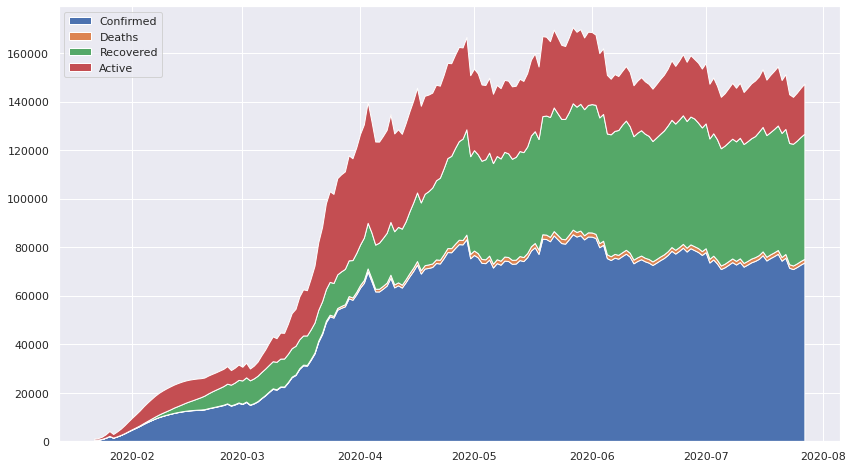

In [212]:
Graphical_data = covid_df_wo.copy()
Graphical_data['Date'] =  pd.to_datetime(Graphical_data['Date'])
world_trends = Graphical_data.groupby('Date')[['Confirmed', 'Deaths','Recovered','Active']].sum().reset_index()
print(world_trends)
x=world_trends.Date.tolist()
y=[world_trends['Confirmed'], world_trends['Deaths'], world_trends['Recovered'], world_trends['Active']]
 
# use a known color palette (see..)
plt.stackplot(x,y, labels=['Confirmed', 'Deaths','Recovered','Active'])
plt.legend(loc='upper left')
plt.show()


#raise NotImplementedError()

- Graph that shows covid-19 spread trends w.r.t different continents i.e. Asia, Europe, America etc (same as above)

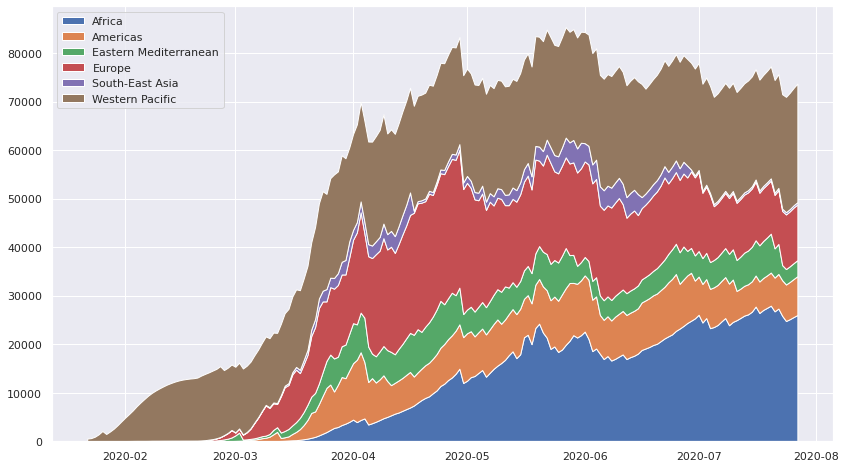

In [213]:
Graphical_data= covid_df_wo.copy()
Graphical_data['Date'] = pd.to_datetime(Graphical_data['Date'])
Covid_19_Spread = Graphical_data.groupby(['Date', 'WHO Region'])[['Confirmed']].sum().reset_index()
Covid_19_Spread = Covid_19_Spread.pivot(index='Date' , columns='WHO Region')['Confirmed']
Covid_19_Spread.reset_index(inplace = True)
x=Covid_19_Spread['Date'].tolist()
y=[Covid_19_Spread['Africa'].tolist(),Covid_19_Spread['Americas'].tolist(),Covid_19_Spread['Eastern Mediterranean'].tolist(),
  Covid_19_Spread['Europe'].tolist(),Covid_19_Spread['South-East Asia'].tolist(),Covid_19_Spread['Western Pacific'].tolist()]
# use a known color palette (see..)
plt.stackplot(x,y, labels=['Africa','Americas','Eastern Mediterranean','Europe','South-East Asia','Western Pacific'])
plt.legend(loc='upper left')
plt.show()

- Pandemic spread trend in China in each month

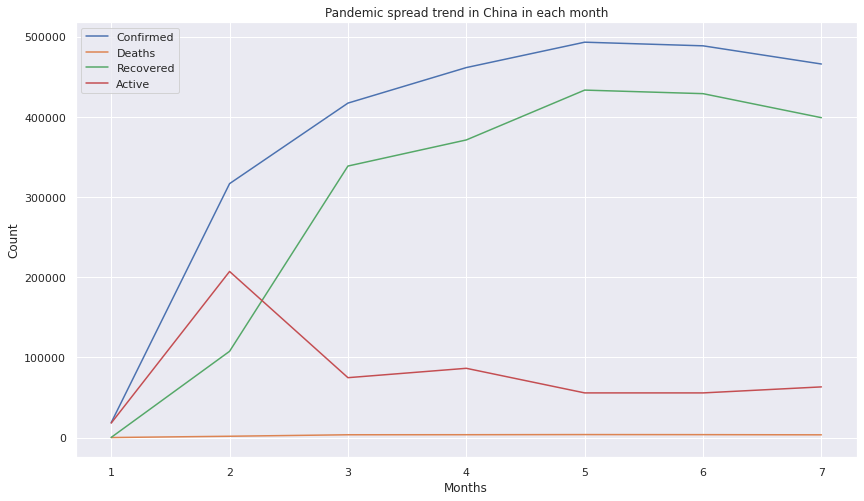

In [214]:
Graphical_data= covid_df_wo.copy()
Graphical_data['Date'] = pd.to_datetime(Graphical_data['Date'], errors='coerce')
Graphical_data['month'] = Graphical_data['Date'].dt.month
China_data=Graphical_data.loc[Graphical_data['Country/Region']=='China']
Pandemic_spread = China_data.groupby('month')[['Confirmed', 'Deaths','Recovered','Active']].sum().reset_index()
x1 = Pandemic_spread.month.tolist()
y1 = Pandemic_spread.Confirmed.tolist()
y2 = Pandemic_spread.Deaths.tolist()
y3 = Pandemic_spread.Recovered.tolist()
y4 = Pandemic_spread.Active.tolist()
# plotting the line 1 points 
plt.plot(x1, y1, label = "Confirmed")
plt.plot(x1, y2, label = "Deaths")
plt.plot(x1, y3, label = "Recovered")
plt.plot(x1, y4, label = "Active")
plt.xlabel('Months')
# Set the y axis label of the current axis.
plt.ylabel('Count')
# Set a title of the current axes.
plt.title('Pandemic spread trend in China in each month')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#raise NotImplementedError()

- Pandemic spread comparison of different continents-Line chart

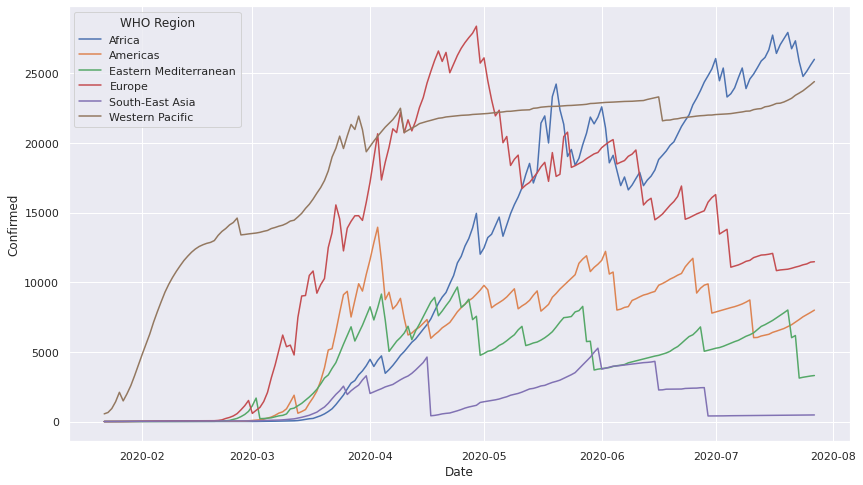

In [215]:
Graphical_data= covid_df_wo.copy()
Graphical_data['Date'] =  pd.to_datetime(Graphical_data['Date'])
Graphical_data=Graphical_data.groupby(['Date', 'WHO Region'])[['Confirmed']].sum().reset_index()
sns.lineplot(data=Graphical_data, x="Date", y="Confirmed", hue="WHO Region")
#raise NotImplementedError()

- Pandemic confirmed and deaths percent split in different countries – Pie chart

In [216]:
Graphical = covid_df_wo.copy()
Graphical_data = Graphical.groupby(["Country/Region"])["Confirmed"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)

fig = px.pie(Graphical_data , values='Confirmed', names='Country/Region',
             title='Confirmed Cases', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()



In [217]:
Graphical = covid_df_wo.copy()
Graphical_data = Graphical.groupby(["Country/Region"])["Deaths"].sum().reset_index().sort_values("Deaths",ascending=False).reset_index(drop=True)

fig = px.pie(Graphical_data , values='Deaths', names='Country/Region',
             title='Deaths Cases', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Mortality rate of each continent – Scatter plo

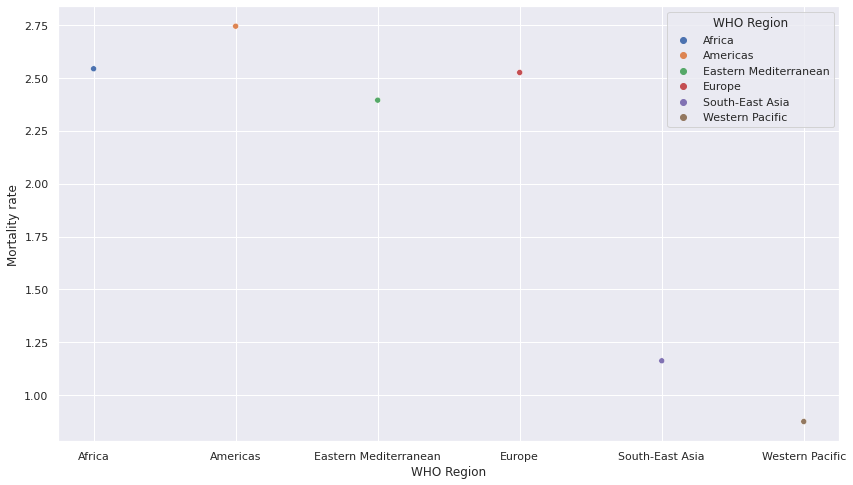

In [218]:
Graphical_data= covid_df_wo.copy()
Graphical_data = Graphical_data.groupby('WHO Region')[['Confirmed', 'Deaths']].sum().reset_index()
Graphical_data['Mortality rate'] = (Graphical_data.Deaths/Graphical_data.Confirmed)*100
#sns.scatterplot(data=Graphical_data, x="WHO Region", y="Mortality rate", hue="WHO Region", sizes=(20, 200), hue_norm=(0, 7), legend="full")
sns.scatterplot(data=Graphical_data, x="WHO Region", y="Mortality rate", hue="WHO Region")
#raise NotImplementedError()

- Confirmed cases in china and outside china in first 50 days- Bar chart and line chart

In [220]:
# YOUR CODE HERE
#raise NotImplementedError()

- Total tests done in Pakistan vs China till Aug 2020 – Bar chart

[10335, 2662010]

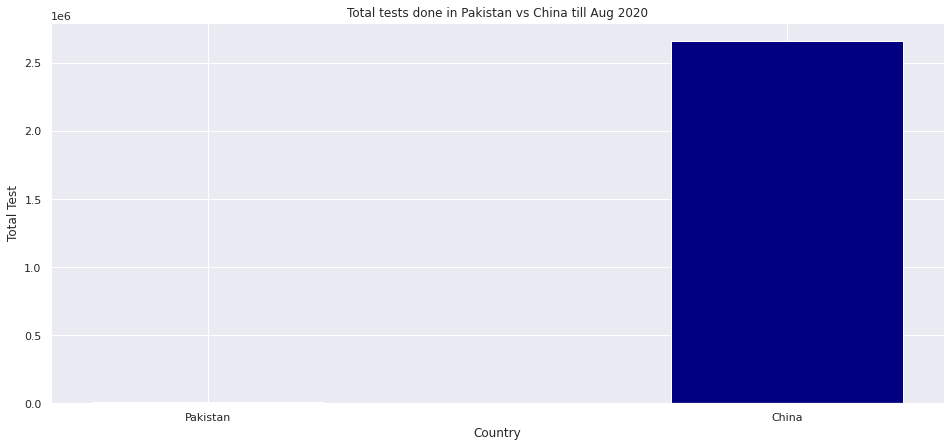

In [223]:
Graphical_data= covid_df_wo.copy()
Graphical_data['Date'] =  pd.to_datetime(Graphical_data['Date'])

Pakista_data= Graphical_data.loc[Graphical_data['Country/Region']=='Pakistan']
China_data=Graphical_data.loc[Graphical_data['Country/Region']=='China']

Pak_test = Pakista_data.groupby('Date')[['Confirmed']].sum().reset_index()
China_test = China_data.groupby('Date')[['Confirmed']].sum().reset_index()

data = {'Pakistan':Pak_test['Confirmed'].sum(), 'China':China_test['Confirmed'].sum()} 
Contry = list(data.keys()) 
Tests = list(data.values()) 
display(Tests)  
fig = plt.figure(figsize = (16, 7)) 
plt.bar(Contry, Tests , color ='navy',  width = 0.4) 
plt.xlabel("Country") 
plt.ylabel("Total Test") 
plt.title("Total tests done in Pakistan vs China till Aug 2020") 
plt.show() 

#raise NotImplementedError()